### 1. Business Understanding

Todos os anos as doenças cardíacas são os principais causadores de morte a nível mundial. De acordo com o relatório da [Organização Mundial de Saúde](https://www.who.int/health-topics/cardiovascular-diseases#tab=tab_1) as doenças cardiovasculares causam anualmente 17,9 milhões de mortes. Muitas dessas mortes ocorrem por causa de ataques cardíacos, derrames, hipertensão e outros.

Os principais comportamentos de risco que estão na origem dessas doenças são:
* Dieta pouco saudável
* Pouca atividade física
* Consumo de tabaco
* Consumo abusivo do álcool

O objetivo deste projeto académico é prever a partir dos dados e suas características, se uma pessoa tem ou não, doença cardíaca. Em termos de jargão de Ciência de Dados, estamos lidando com um problema de `classificação`, nomeadamente uma `classificação binária`, isto é, temos duas classes a prever na variável dependente.

Para análise, transformação de dados e criação do modelo de machine learning usarei as bibliotecas mais populares num processo de Data Science, sendo elas:
* Pandas
* Numpy
* Matplolib
* Seaborn
* Scikit-Learn

### 2. Data Understanding

Os dados usados neste projeto foram adquiridos no [Kaggle](https://www.kaggle.com/ronitf/heart-disease-uci), mas também pode ser encontrada no site [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/heart+Disease)

Este dataset é composto por 303 linhas e 14 colunas (variáveis). 

#### Descrição dos dados

1. age = idade em anos
2. sex = género(0 = femenino; 1 = masculino)
3. cp = tipo de dor no peito (angina):
    * 0 - Angina Típica
    * 1 - Angina Atípica
    * 2 - Dor não relacionada com angina
    * 3 - Assintomático (dor que não demostra sinais de doença)
4. trestbps = pressão arterial(mm/hg)
    * valores acima de 130 é motivo para preocupação
5. chol = níveis de colesterol
6. fbs = Glicemia de jejum normal
    * valores acima de 126 mg/dl é sinal de diabetes
7. restecg = eletrocardiograma de repouso
    * 0 - Nada a notar
    * 1 - ST-T anormal (sinais de batimentos cardíacos anormais)
    * 2 - Possíveis sinais de hipertrofia ventricular esquerda
8. thalach = níveis máximos de batimentos cardíacos atingidos
9. exang = angina provocada por exercícios físicos (0 = Não; 1 = Sim)
10. oldpeak = estresse no coração no momento de exercício.
11. slope = declive no nível de estresse no momento de exercício
    * 0: Upsloping - bom nível de batimento cardíaco com exercícios
    * 1: Flatsloping - Coração saudável
    * 2: Downsloping - sinais de coração não saudável
12. ca = número de veias sanguíneas que são possíveis de ver com fluoroscopia
13. thal = resultado de estresse com tálio
    * é um exame de radiografia que permite ao doutor ver o quão bom o sangue circula até ao coração
14. target = é a variável dependente (0: Não tem doença cardíaca; 1: tem doença cardíaca)

#### Exploração dos dados

In [ ]:
# manipulação e transformação de dados
import pandas as pd
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

# Criação dos modelos
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.svm import SVC # Support Vector Machine
from sklearn.ensemble import RandomForestClassifier # Random Forest

# Avaliação e melhorias
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # metrics
from sklearn.metrics import plot_roc_curve

# desativar os avisos
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

In [ ]:
# carregamento do dataset
df_heart = pd.read_csv('heart.csv')

In [ ]:
# verificar as 5 primeiras linhas
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# verificar as 5 últimas linhas
df_heart.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
# tamanho do dataset
# Anteriormente já tinha dito que era 303 linhas e 14 colunas
df_heart.shape

(303, 14)

In [ ]:
# verificação de informação em mais detalhes
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


De acordo com o output acima dá para perceber que existem 13 variáveis do tipo numérico discreto e um número contínuo (oldpeak). Dá para perceber também que não existem nenhum valor nulo no dataset.

In [ ]:
# verificar a existência de duplicados
df_heart.duplicated().sum()

1

Temos um valor duplicado que será tratado mais a frente.

In [ ]:
# verificação do total dos valores únicos em cada variável
df_heart.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

Temos 4 variáveis com classes binárias (sex, fbs, exang e target)

Algumas variáveis tal como "ca", "thal" tem classes que têm valores únicos no dataset original. Eles serão transformados para NaN e depois removidos/substituídos. [Link do artigo](https://www.kaggle.com/ronitf/heart-disease-uci/discussion/105877)

In [ ]:
# Verificação de alguns dados estatísticos
df_heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Distribuição da variável Doença Cardíaca (target)

In [ ]:
# contagem de valores nas classes da variável "target"
df_heart['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

De acordo com o output acima dá para perceber que temos uma situação de balanceamento de classes, o que permite avançar com a criação do modelo sem preocupar com classes não balanceadas. 

Podemos observar visualmente:

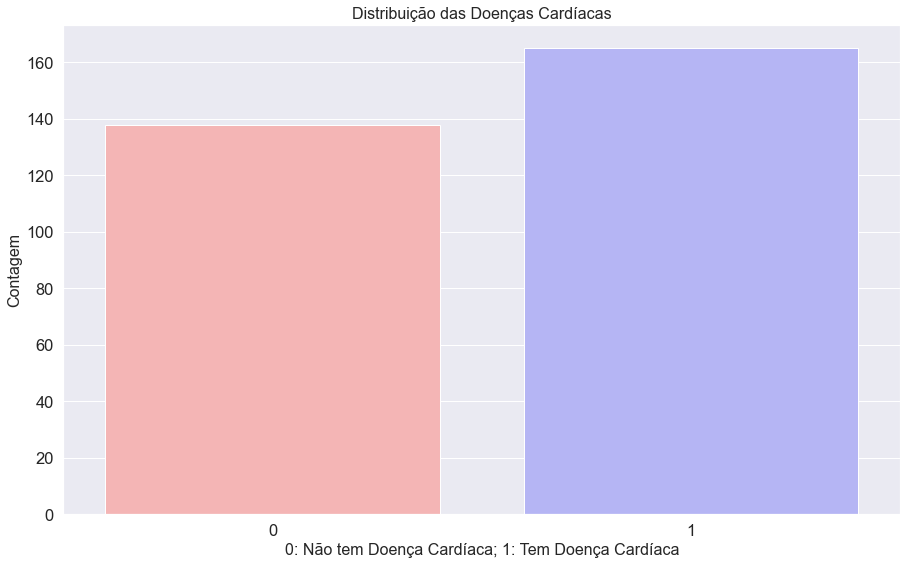

In [ ]:
# visualização dos dados da variácel "target"
plt.figure(figsize=(15, 9));
sns.countplot(x = "target", data = df_heart, palette = 'bwr_r');
plt.title('Distribuição das Doenças Cardíacas', fontsize=16);
plt.xlabel("0: Não tem Doença Cardíaca; 1: Tem Doença Cardíaca", fontsize=16);
plt.ylabel('Contagem', fontsize=16);

De acordo com o output acima podemos constatar que temos uma dsitribuição quase balanceada entre as duas classes. Por si só, o problema de desbalanceamento de dados não será abordado neste projeto.

#### Doença cardíaca distribuída pelos sexos

In [ ]:
df_heart['sex'].value_counts().rename({1: 'Masculino', 0: "Feminino"})

Masculino    207
Feminino      96
Name: sex, dtype: int64

In [ ]:
# mais detalhado
pd.crosstab(df_heart.target, df_heart['sex']).rename(columns={0: 'Feminino', 1: 'Masculino'},
                                                    index={0: 'Sem Doença Cardíaca', 1: 'Com Doença Cardíaca'})

sex,Feminino,Masculino
target,,
Sem Doença Cardíaca,24,114
Com Doença Cardíaca,72,93


O número de doentes cardíacos é mais predominante nos homens, com um total de 93 casos. Curiosamente o número de pessoas sem doenças cardíacas é também maior nos homens com um total de 114 casos.

Visualmente podemos constatar:

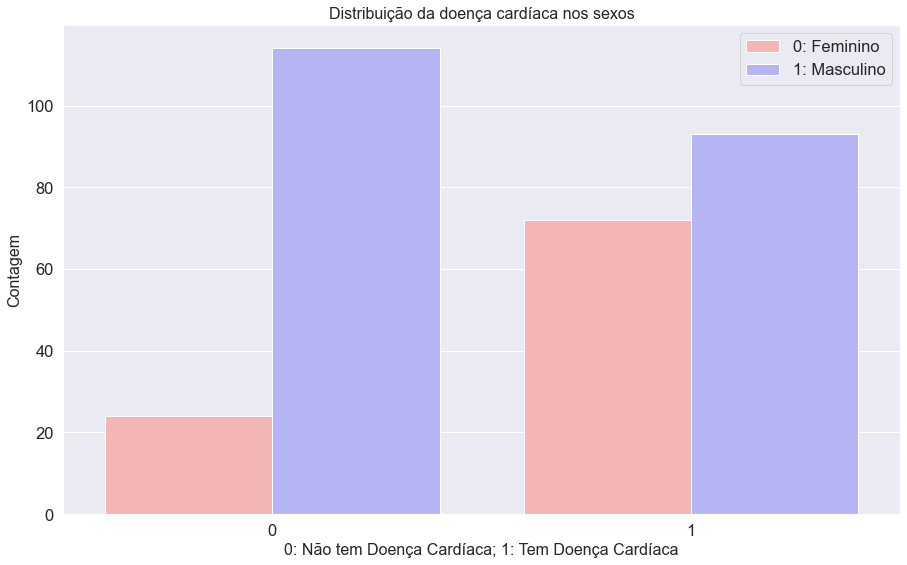

In [ ]:
hue_label = ['0: Feminino', "1: Masculino"]
plt.figure(figsize=(15, 9));
ax = sns.countplot(x = "target", hue = "sex", data = df_heart, palette = 'bwr_r');
ax.legend(hue_label, bbox_to_anchor=(1, 1))
plt.title('Distribuição da doença cardíaca nos sexos', fontsize=16);
plt.xlabel("0: Não tem Doença Cardíaca; 1: Tem Doença Cardíaca", fontsize=16);
plt.ylabel('Contagem', fontsize=16);

#### Doença cardíaca de acordo com os tipos de dores de peito

In [ ]:
df_heart['cp'].value_counts().rename(index={0: 'Typical Angina', 1: 'Atypical Angina', 2: 'Non-angina',
                                                             3: 'Asymtomatic'})

Typical Angina     143
Non-angina          87
Atypical Angina     50
Asymtomatic         23
Name: cp, dtype: int64

In [ ]:
pd.crosstab(df_heart['cp'], df_heart['target']).rename(columns={0: 'No Disease', 1: 'Disease'}, 
                                index={0: 'Typical Angina', 1: 'Atypical Angina', 2: 'Non-angina', 3: 'Asymptomatic'})

target,No Disease,Disease
cp,,
Typical Angina,104,39
Atypical Angina,9,41
Non-angina,18,69
Asymptomatic,7,16


Brevemente dá para perceber que pessoas com dores não relacionadas com angina são os que mais têm doenças cardíacas, enquanto que os que tem angina normal não têm doença cardíaca.

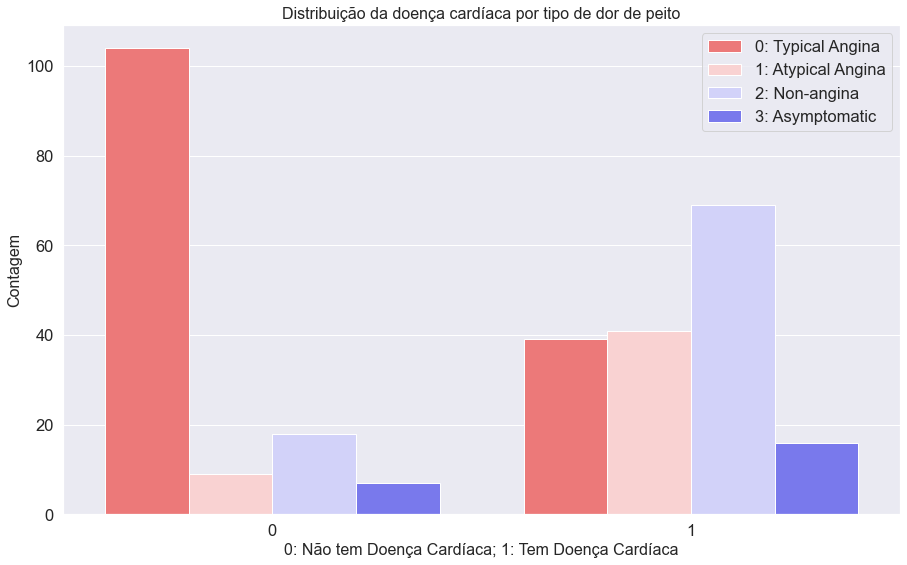

In [ ]:
hue_label = ['0: Typical Angina', "1: Atypical Angina", "2: Non-angina", "3: Asymptomatic"]
plt.figure(figsize=(15, 9));
ax = sns.countplot(x = "target", hue = "cp", data = df_heart, palette = 'bwr_r');
ax.legend(hue_label, bbox_to_anchor=(1, 1))
plt.title('Distribuição da doença cardíaca por tipo de dor de peito', fontsize=16);
plt.xlabel("0: Não tem Doença Cardíaca; 1: Tem Doença Cardíaca", fontsize=16);
plt.ylabel('Contagem', fontsize=16);

#### Taxa máxima de batimento cardíaco

In [ ]:
df_heart['thalach'].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

##### Relação de batimentos cardíacos com a idade

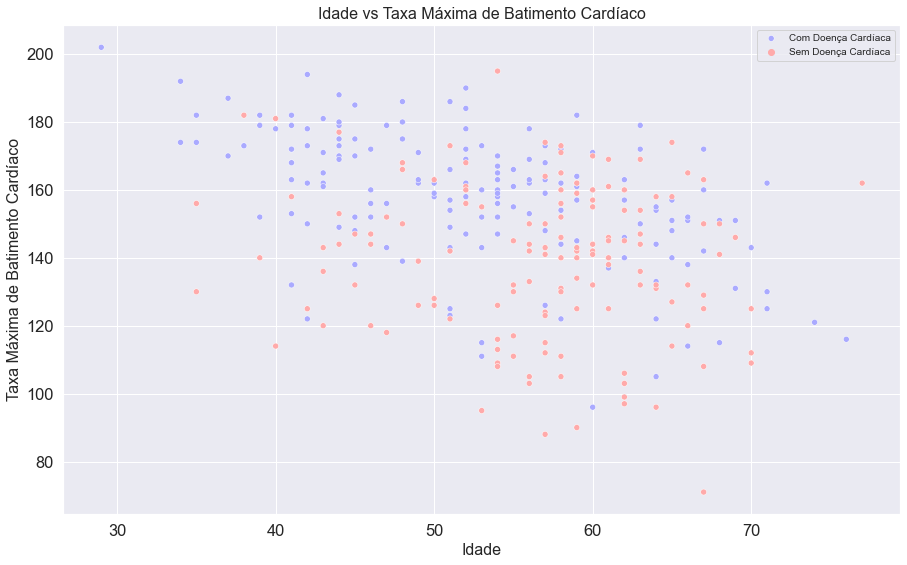

In [ ]:
plt.figure(figsize=(15, 9));
sns.scatterplot(x = 'age', y = 'thalach', hue = 'target', data = df_heart, palette = 'bwr_r');
plt.xlabel('Idade', fontsize=16);
plt.ylabel('Taxa Máxima de Batimento Cardíaco', fontsize=16);
plt.title('Idade vs Taxa Máxima de Batimento Cardíaco', fontsize=16)
plt.legend(['Com Doença Cardíaca', 'Sem Doença Cardíaca'], fontsize=10);

Há um padrão decrescente nos valores de ritmos cardiacos de acordo com o aumento da idade. Isso acaba por ser algo normal com o avançar da idade da maioria das pessoas.

#### Doença Cardíaca vs Angina originada por Exercício (exang)

In [ ]:
df_heart['exang'].value_counts().rename(index={0: 'Não', 1: 'Sim'})

Não    204
Sim     99
Name: exang, dtype: int64

In [ ]:
pd.crosstab(df_heart['exang'], df_heart['target']).rename(columns={0: 'Sem Doença Cardíaca', 1: 'Com Doença Cardíaca'}).rename(
index={0: 'Não', 1: 'Sim'})

target,Sem Doença Cardíaca,Com Doença Cardíaca
exang,,
Não,62,142
Sim,76,23


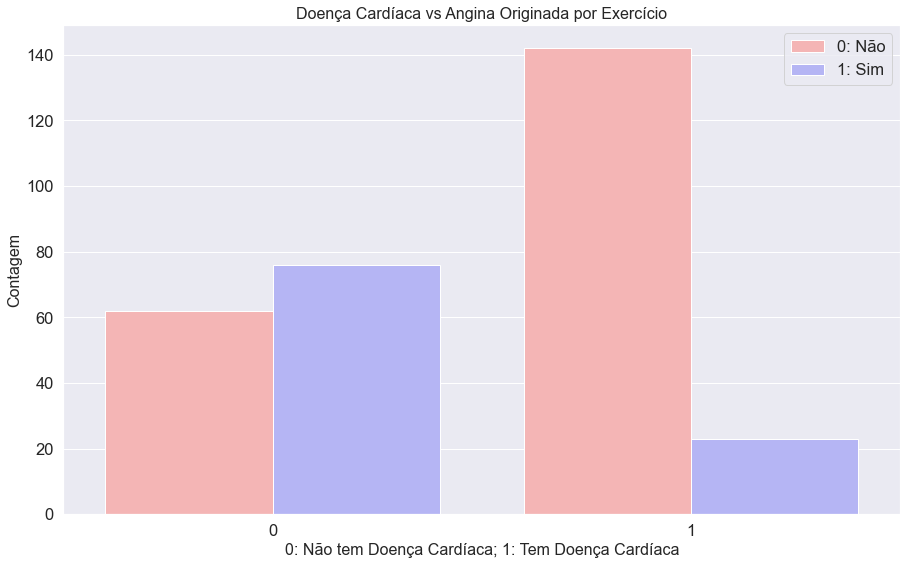

In [ ]:
hue_label = ['0: Não', "1: Sim"]
plt.figure(figsize=(15, 9));
ax = sns.countplot(x = "target", hue = "exang", data = df_heart, palette = 'bwr_r');
ax.legend(hue_label, bbox_to_anchor=(1, 1))
plt.title('Doença Cardíaca vs Angina Originada por Exercício', fontsize=16);
plt.xlabel("0: Não tem Doença Cardíaca; 1: Tem Doença Cardíaca", fontsize=16);
plt.ylabel('Contagem', fontsize=16);

### 3. Data Preparation

In [ ]:
# eliminar o valor duplicado identificado acima
df_heart.drop_duplicates(inplace=True)

In [ ]:
# Nova dimensão do dataset
df_heart.shape

(302, 14)

#### Transformação dos classes nas variáveis "ca" e "thal"

Na variável "ca" temos uma classe 4 que no dataset original são valores nulos. O mesmo acontece com com classe 0 na variável "thal". Eles serão tratados logo abaixo substituindo-os pela média.

In [ ]:
df_heart.ca.value_counts()

0    175
1     65
2     38
3     20
4      4
Name: ca, dtype: int64

In [ ]:
# identificação das linhas onde estão esses valores
df_heart.loc[df_heart['ca'] == 4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


In [ ]:
# substitur os valores da classe 4 com a média 
df_heart.replace({'ca': 4}, df_heart['ca'].median(), inplace=True)

In [ ]:
# outra verificação 
df_heart.loc[df_heart['ca'] == 4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [ ]:
# valores únicos
df_heart['ca'].unique()

array([0, 2, 1, 3], dtype=int64)

In [ ]:
# verificação na variável "thal"
df_heart['thal'].value_counts()

2    165
3    117
1     18
0      2
Name: thal, dtype: int64

In [ ]:
df_heart.loc[df_heart['thal'] == 0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


In [ ]:
# substituição pela média
df_heart.replace({'thal': 0}, df_heart['thal'].median(), inplace = True)

In [ ]:
df_heart['thal'].value_counts()

2    167
3    117
1     18
Name: thal, dtype: int64

In [ ]:
df_heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Verificação de outliers

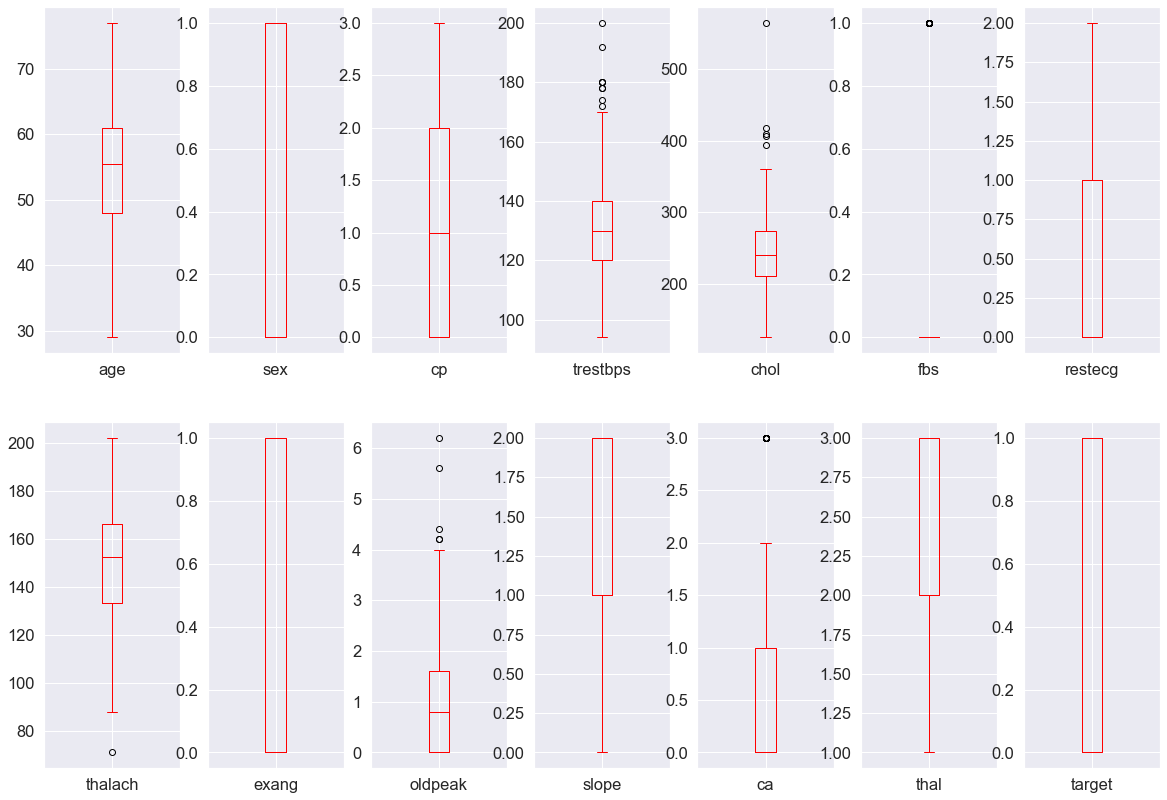

In [ ]:
df_heart.plot(kind='box', subplots=True, layout=(2,7),
sharex=False,sharey=False, figsize=(20, 14), 
color='Red');

In [ ]:
# Antes de proceder a remoção dos outliers vou criar uma cópia do dataframe em caso de necessidade futura
df2 = df_heart.copy()
# verificação do tamanho
df2.shape

(302, 14)

Temos outliers em algumas variáveis. 
* "trestbps" - 
* "chol" - Níveis de colesterol
* "oldpeak" - 
* "thalach" - Níveis de Batimentos Cardíacos
* "ca" - 

Usarei o IQR (Intervalo Interquartil para os remover porque se os deixar podem afetar a performance dos algoritimos)

IQR = Q3 - Q1

In [ ]:
df_heart[['trestbps', 'chol', 'oldpeak', 'thalach', 'ca']].describe()

,trestbps,chol,oldpeak,thalach,ca
count,302.000000,302.000000,302.000000,302.000000,302.000000
mean,131.602649,246.500000,1.043046,149.569536,0.665563
std,17.563394,51.753489,1.161452,22.903527,0.935142
min,94.000000,126.000000,0.000000,71.000000,0.000000
25%,120.000000,211.000000,0.000000,133.250000,0.000000
50%,130.000000,240.500000,0.800000,152.500000,0.000000
75%,140.000000,274.750000,1.600000,166.000000,1.000000
max,200.000000,564.000000,6.200000,202.000000,3.000000


In [ ]:
# definição das variáveis com outliers
var_outliers = ['trestbps','chol','oldpeak','thalach', 'ca']  
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25% dos dados em cada variável selecionada
        Q3 = np.percentile(feature_data, 75.) # 25% dos dados em cada variável selecionada
        IQR = Q3-Q1 # Intervalo Interquartil
        outlier_step = IQR * 1.5 
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print(f'Para a variável {each_feature}, o número de outliers é {len(outliers)}')
        if drop:
            df_heart.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers da variável {} foi removida'.format(each_feature))

outliers(df_heart[var_outliers])

Para a variável trestbps, o número de outliers é 9
Para a variável chol, o número de outliers é 5
Para a variável oldpeak, o número de outliers é 5
Para a variável thalach, o número de outliers é 1
Para a variável ca, o número de outliers é 20


In [ ]:
outliers(df_heart[var_outliers], drop=True)

Outliers da variável trestbps foi removida
Outliers da variável chol foi removida
Outliers da variável oldpeak foi removida
Outliers da variável thalach foi removida
Outliers da variável ca foi removida


In [ ]:
# verificação do tamanho do dataset
df_heart.shape

(267, 14)

Com a eliminação dos outliers, houve uma diminuição no tamanho do dataset. Veremos como isso afeta a performance do modelo.

In [ ]:
# Matriz de Correlações usando o coeficiente de Pearson
# A matriz de correlação mostra a relação entre as variáveis

corr = df_heart.corr()
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.078829,-0.036902,0.270831,0.141238,0.113700,-0.092270,-0.401442,0.082443,0.203450,-0.144881,0.386914,0.065015,-0.195577
sex,-0.078829,1.000000,-0.099385,0.007167,-0.138996,0.069056,-0.071646,-0.044145,0.176218,0.163892,-0.066116,0.083045,0.251820,-0.324949
cp,-0.036902,-0.099385,1.000000,0.109583,-0.042255,0.116747,0.066811,0.271903,-0.384987,-0.126638,0.093328,-0.210207,-0.191294,0.414467
trestbps,0.270831,0.007167,0.109583,1.000000,0.091962,0.133498,-0.127069,-0.034418,-0.016930,0.150349,-0.055113,0.053911,-0.009377,-0.085647
chol,0.141238,-0.138996,-0.042255,0.091962,1.000000,-0.022857,-0.127379,0.000579,0.052937,-0.016132,0.049542,0.096078,0.082509,-0.086426
fbs,0.113700,0.069056,0.116747,0.133498,-0.022857,1.000000,-0.080936,-0.009861,0.023630,0.020551,-0.095554,0.101809,-0.067391,-0.029648
restecg,-0.092270,-0.071646,0.066811,-0.127069,-0.127379,-0.080936,1.000000,0.078702,-0.094060,-0.088913,0.119091,-0.083894,0.052757,0.147573
thalach,-0.401442,-0.044145,0.271903,-0.034418,0.000579,-0.009861,0.078702,1.000000,-0.410416,-0.332581,0.368735,-0.243349,-0.141075,0.396398
exang,0.082443,0.176218,-0.384987,-0.016930,0.052937,0.023630,-0.094060,-0.410416,1.000000,0.346064,-0.273397,0.182095,0.250474,-0.437445
oldpeak,0.203450,0.163892,-0.126638,0.150349,-0.016132,0.020551,-0.088913,-0.332581,0.346064,1.000000,-0.526020,0.284681,0.179710,-0.438855


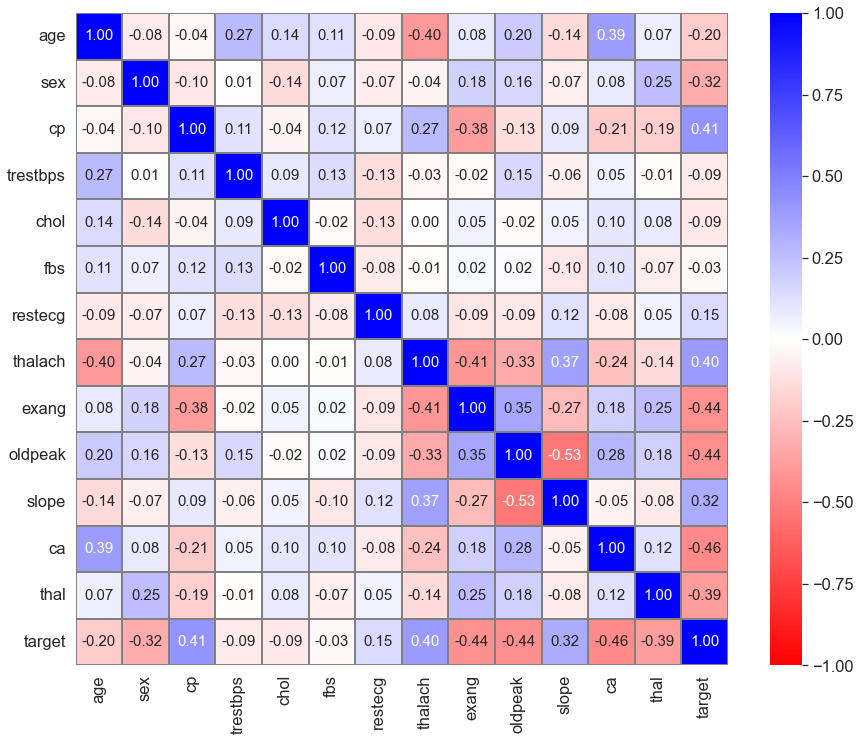

In [ ]:
# Visualmente
plt.figure(figsize=(15, 12));
sns.heatmap(corr, annot=True, cmap='bwr_r', vmin=-1, vmax=1, center=0, fmt=".2f", square=True,
           annot_kws={'fontsize': 15}, linewidths=1.5, linecolor='gray');

Algumas conclusões a tirar:

* Com o aumento de "cp" dores no peito, aumenta as chances de doença cardíaca.
* com a aumento dos batimentos cardíacos (thalach), aumenta as chances de doença cardíaca;
* Existe uma relação negativa entre (exang e a variável dependente "target"). Isso faz sentido porque quando uma pessoa exercita, o coração necessita de mais sangue.
* Com o aumento de estresse (oldpeak) na hora do exercício, aumenta as chances de doença cardíaca;
* Idem para o "slope" - declive no nível de estresse no momento de exercício

Podemos visualziar também as correlações com o `pairplot`. É um gráfico muito útil nesse tipo de situações. Neste caso escolhi apenas as variáveis com maiores níveis de correlação com a variável `target` para poder visualizar melhor.

<Figure size 1800x1440 with 0 Axes>

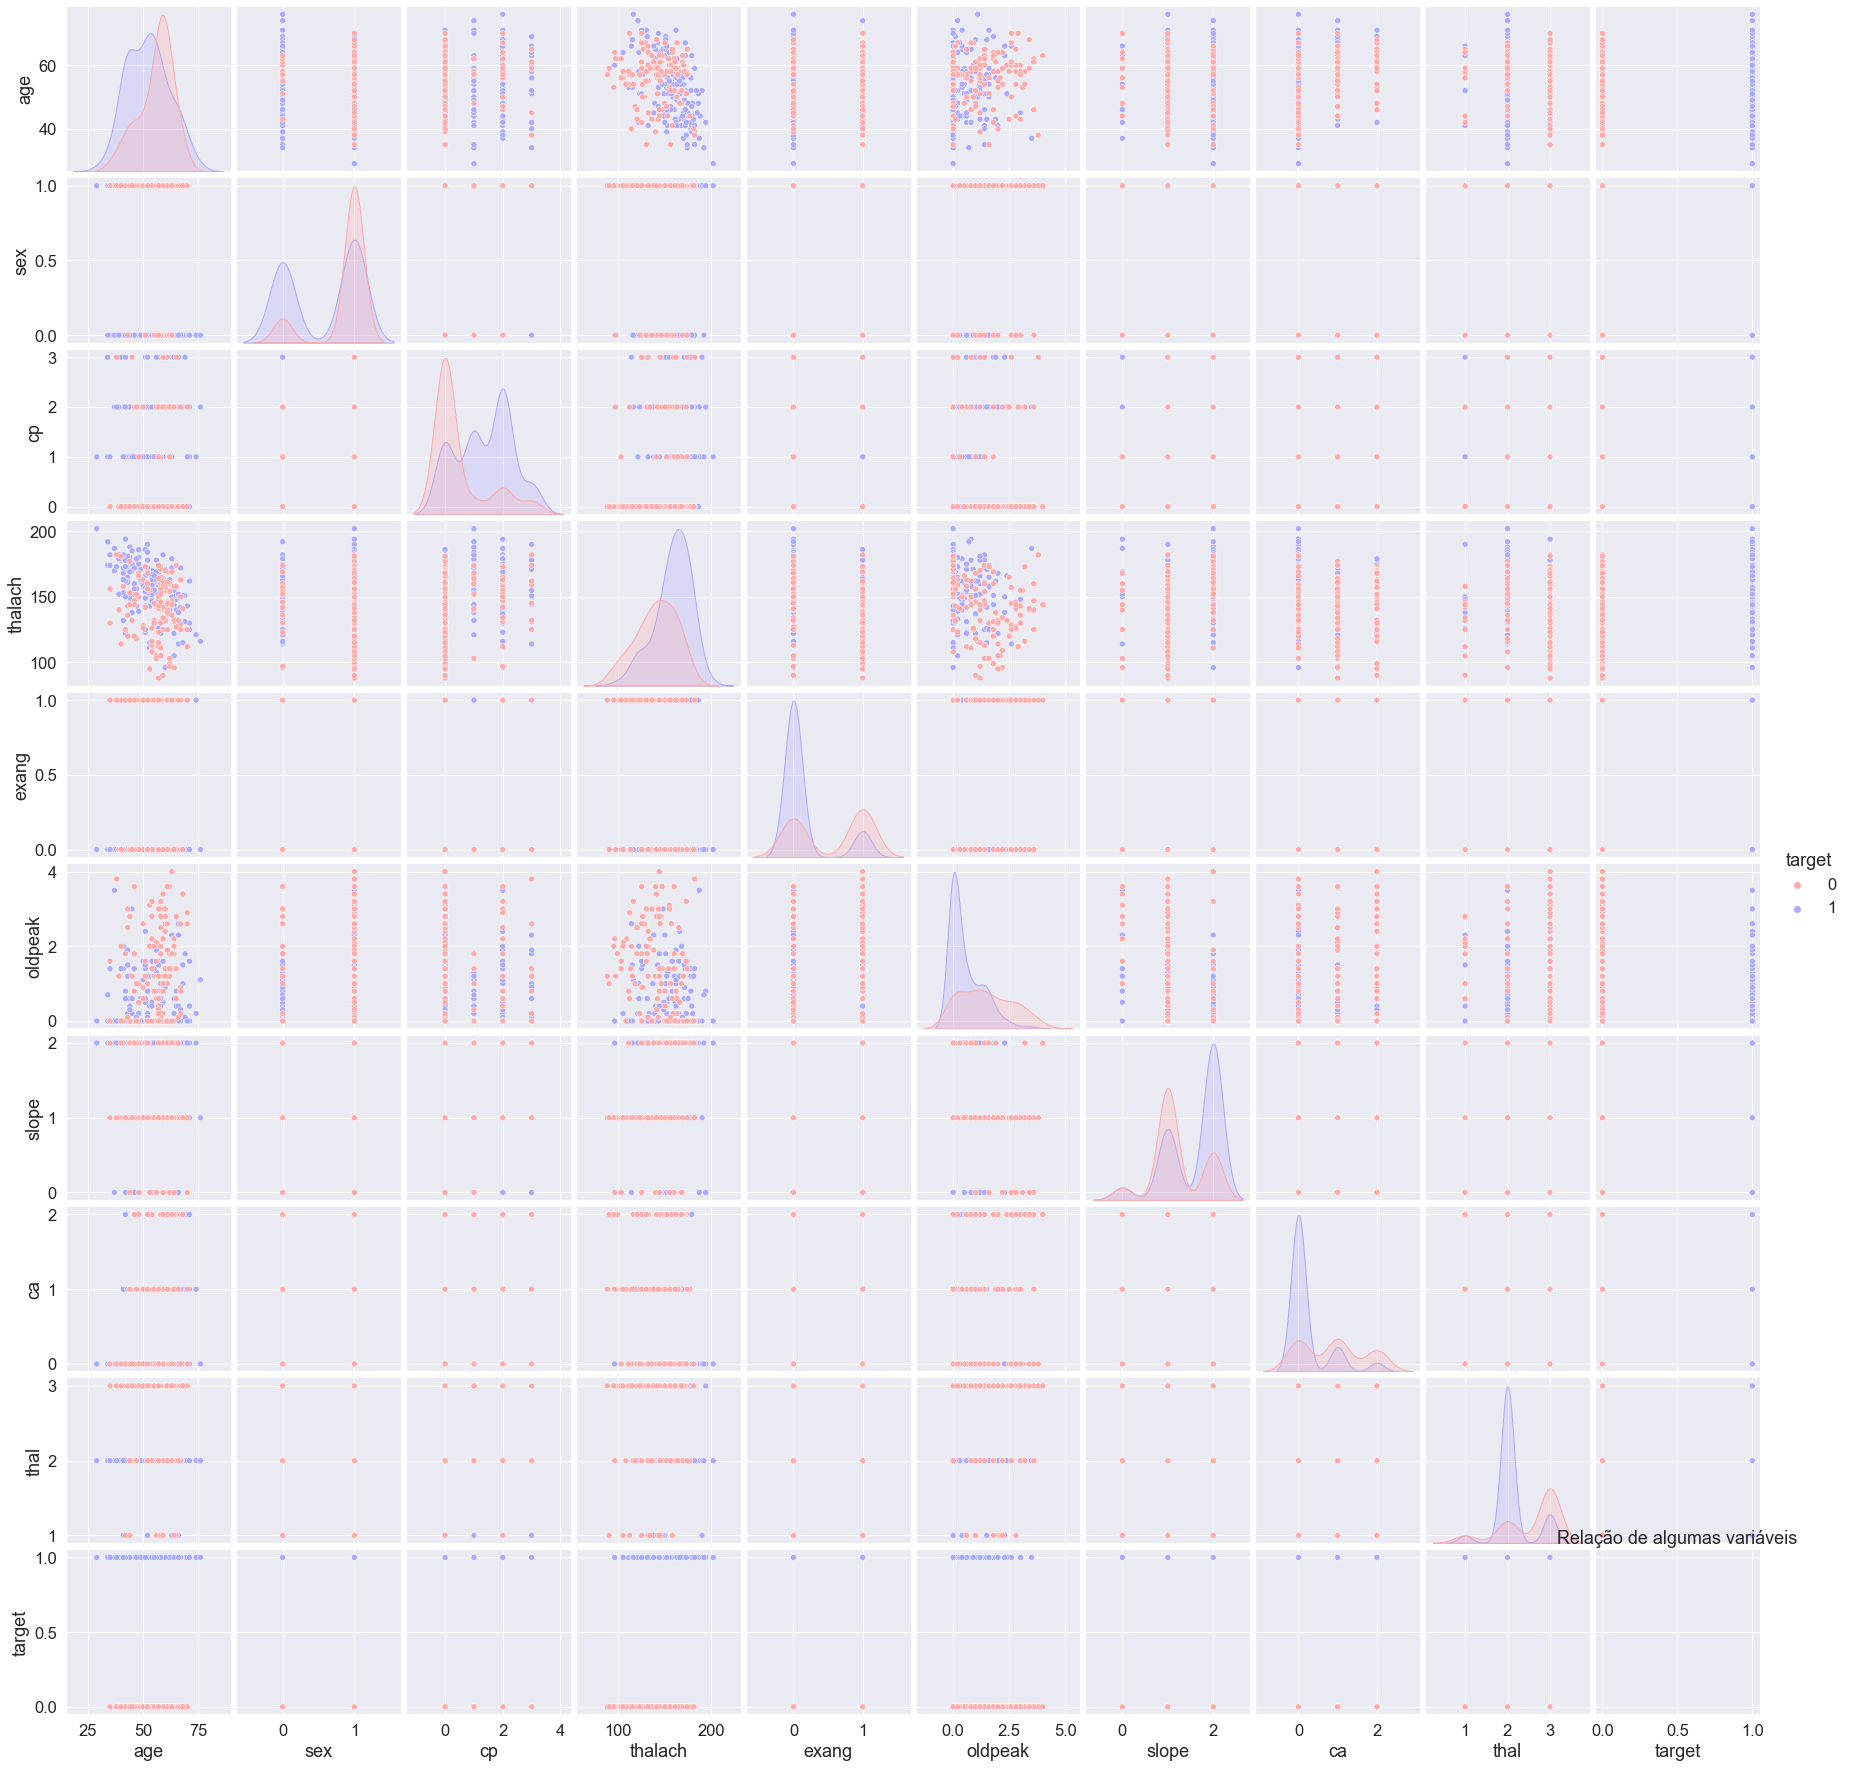

In [ ]:
plt.figure(figsize=(25, 20));
sns.pairplot(df_heart, hue='target', diag_kind='kde', vars=['age', 'sex', 'cp', 'thalach', 'exang', 'oldpeak', 'slope',
                                          'ca', 'thal', 'target'], palette = 'bwr_r');
plt.title('Relação de algumas variáveis');

### 4. Modelling

Depois de passar por todo o processo de análise exploratória e limpezas, vou passar agora para o processo da criação dos modelos preditivos.

In [ ]:
# separação das variáveis independentes da variável dependente(target)

X = df_heart.drop("target", axis = 1)
y = df_heart['target']

In [ ]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 267, dtype: int64

In [ ]:
# divisão dos dados em conjunto de treino e teste

np.random.seed(42)
# o random seed certifica que os dados são divididos da mesma forma sempre que o código for executado

# 80% para treino e 20% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
X_train.head

<bound method NDFrame.head of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
136   60    0   2       120   178    1        1       96      0      0.0   
253   67    1   0       100   299    0        0      125      1      0.9   
94    45    0   1       112   160    0        1      138      0      0.0   
301   57    1   0       130   131    0        1      115      1      1.2   
82    60    0   2       102   318    0        1      160      0      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
21    44    1   2       130   233    0        1      179      1      0.4   
201   60    1   0       125   258    0        0      141      1      2.8   
74    43    0   2       122   213    0        1      165      0      0.2   
115   37    0   2       120   215    0        1      170      0      0.0   
111   57    1   2       150   126    1        1      173      0      0.2   

     slope  ca  thal  
136      2   0     2  
253      1 

In [ ]:
y_train

136    1
253    0
94     1
301    0
82     1
      ..
21     1
201    0
74     1
115    1
111    1
Name: target, Length: 213, dtype: int64

Com os dados divididos em treino e teste, vamos agora criar os nossos modelos. 

Usarei os seguintes algoritmos:

* K-Nearest Neighbours
* Support Vector Machine
* Random Forest Classifier

O mapa a seguir mostra uma forma de escolher os modelos baseado no problema em questão. Como estou a lidar com um problema de `classificação` escolhi usar esses três algoritmos.

![](https://scikit-learn.org/stable/_static/ml_map.png)

Criarei uma baseline dos 3 algoritmos sem aplicar nenhum parâmetro. Depois de visualizar os resultados iniciais, poderei saber qual melhoria será necessária para cada.

In [ ]:
models = {"KNN": KNeighborsClassifier(),
          "SVM": SVC(),
         "Random Forest": RandomForestClassifier()}

In [ ]:
# funcão para treinar o modelo

def fit_score(models, X_train, X_test, y_train, y_test):
    
    # random seed
    np.random.seed(42)
    
    # dicionário para guardar os resultados dos modelos
    model_scores = {}
    for name, model in models.items():
        
        #fit calcula o parâmetro de aprendizagem de cada modelo
        model.fit(X_train, y_train)
        
        # avaliar o modelo
        model_scores[name] = model.score(X_test, y_test)
    
    return model_scores

In [ ]:
model_scores = fit_score(models = models, X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test)
model_scores

{'KNN': 0.5555555555555556,
 'SVM': 0.6296296296296297,
 'Random Forest': 0.8333333333333334}

#### Comparação dos modelos

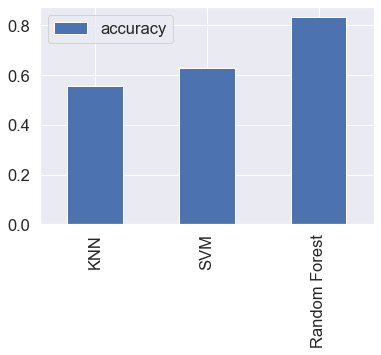

In [ ]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

Com isso já temos uma baseline da primeira predição. O Random Forest apresentou os melhores resultados. Por outro lado o KNN apresentou resultados menos bom. Considerando que as primeiras predições nem sempre são as melhores, vou tentar algumas técnicas para melhorar os modelos e ver suas classificações.

Usarei:

Para "tuning" ou melhoria:
* Hyperparameter tuning (Randomized GridSearchCV e GridSearchCV)
* Cross-validation

Para classificação e avaliação dos resultados:
* Matriz de confusão
* Outras métricas além de accuracy (Precision, Recall e F1)
* Relatório de classificação (classification report)
* Curva ROC e AUC (area under the curve) 


#### Hyperparameter tuning

##### 1º - KNN

Este algoritmo é usado tanto para os problemas de classificação e de regressão. O KNN classifica novos dados baseado na proximidade dos K-neighbors(dados de treino). Se os novos dados estão rodeados por dados de treino em que a classe é 1 (tem doença cardíaca), os novos dados terão essa classe.

In [ ]:
# Tune KNN
train_scores = []
test_scores = []

neighbors = range(1, 21) # Usando apenas nº de vizinhos como parâmetros

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    
    test_scores.append(knn.score(X_test, y_test))

In [ ]:
train_scores

[1.0,
 0.7699530516431925,
 0.7652582159624414,
 0.7605633802816901,
 0.7699530516431925,
 0.7746478873239436,
 0.7417840375586855,
 0.7370892018779343,
 0.7323943661971831,
 0.704225352112676,
 0.7276995305164319,
 0.6901408450704225,
 0.6854460093896714,
 0.6619718309859155,
 0.6901408450704225,
 0.6713615023474179,
 0.676056338028169,
 0.6713615023474179,
 0.6854460093896714,
 0.6901408450704225]

In [ ]:
test_scores

[0.6111111111111112,
 0.5555555555555556,
 0.6111111111111112,
 0.5370370370370371,
 0.5555555555555556,
 0.6296296296296297,
 0.6111111111111112,
 0.5925925925925926,
 0.6481481481481481,
 0.6481481481481481,
 0.6111111111111112,
 0.6666666666666666,
 0.6481481481481481,
 0.6851851851851852,
 0.6666666666666666,
 0.6851851851851852,
 0.7222222222222222,
 0.7037037037037037,
 0.7037037037037037,
 0.7037037037037037]

O resultado máximo no conjunto de teste 72.22%


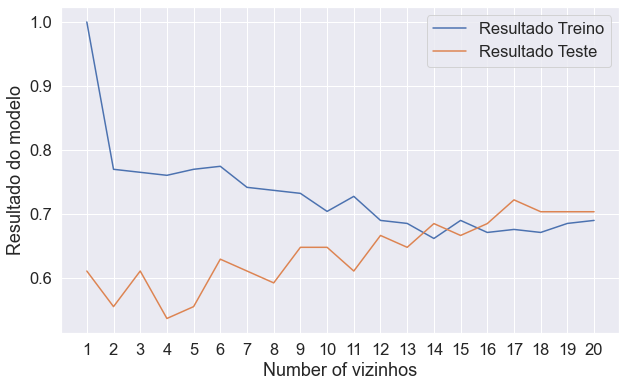

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(neighbors, train_scores, label = 'Resultado Treino');
plt.plot(neighbors, test_scores, label = 'Resultado Teste');
plt.xticks(np.arange(1, 21, 1));
plt.xlabel("Number of vizinhos");
plt.ylabel('Resultado do modelo');
plt.legend()
print(f'O resultado máximo no conjunto de teste {max(test_scores) * 100:.2f}%')

In [ ]:
# pegar os resultados da baseline
model_scores

{'KNN': 0.5555555555555556,
 'SVM': 0.6296296296296297,
 'Random Forest': 0.8333333333333334}

Com 17 vizinhos atingimos 72% no conjunto de teste. É uma melhoria em relação ao baseline de 56% ficando abaixo do `SVM`e ods 83% do `Random Forest`.

#### k-Fold Cross-Validation

Vou usar o Cross-validation para ver se consigo aumentar o resultado.

Antes de treinar o modelo divide separei os dados em 80% para treino e 20% para teste. Após o modelo treinado utilizei os dados do conjunto de teste para avaliar o desempenho do modelo utilizando dados nunca antes vistos pelo mesmo. É uma boa abordagem porém pode não ser suficiente para avaliar o modelo e é nessa hora que entra o `Cross Validation`.

`Cross Validation` é uma técnica muito utilizada para avaliação de desempenho de modelos de aprendizado de máquina. O CV consiste em particionar os dados em conjuntos(partes), onde um conjunto é utilizado para treino e outro conjunto é utilizado para teste e avaliação do desempenho do modelo. 

`K-fold Cross Validation`

K-fold consiste em dividir a base de dados de forma aleatória em K subconjuntos (em que K é definido previamente) com aproximadamente a mesma quantidade de amostras em cada um deles. A cada iteração, treino e teste, um conjunto formado por K-1 subconjuntos são utilizados para treino e o subconjunto restante será utilizado para teste gerando um resultado de métrica para avaliação (ex: acurácia)

Por exemplo, para `5-fold cross-validation`, o conjunto de dados é dividido em 5 grupos, sendo o modelo treinado e testado em 5 situações diferentes, dando a cada grupo uma chance de ser o "conjunto de teste". Graficamente podemos ver na imagem a seguir:
![](https://miro.medium.com/max/875/1*NyvaFiG_jXcGgOaouumYJQ.jpeg)

In [ ]:
# criação do modelo KNN
knn_cv = KNeighborsClassifier(n_neighbors=20)

In [ ]:
# treino do modelo com 5 Fold Cross-validation
cv_scores = cross_val_score(knn_cv, X, y, cv=5)

In [ ]:
#print each cv score (accuracy) and average them
print(cv_scores)
print(f"Com o cross-validation o modelo atingiu um valor médio de: {np.median(cv_scores)}")

[0.64814815 0.62962963 0.64150943 0.73584906 0.58490566]
Com o cross-validation o modelo atingiu um valor médio de: 0.6415094339622641


Após aplicar o K-Fold Cross Validation, houve uma regressão no resultado. Vou usar o GridSearch que é um método de melhoria de encontrar os melhores hiperparâmetros e melhoria de resultado.

#### Hyperparameter tuning com GridSearchCV - KNN

O GridSearch é usado para encontrar os hiperparâmetros ótimos de cada modelo, o que resulta em previsões muito "precisas". Esse método permite criar um modelo para todas as combinações de hiperparâmetros especificados. Após executar o modelo, podemos verificar quais são os parâmetros mais ótimos (os "best_params").

Existe um outro método que faz o tuning dos modelos onde os hiperparâmetros são escolhidos de forma aleatória. Esse chama `RandomizedSearchCV`.

In [ ]:
# definir o random seed
np.random.seed(42)


knn_params = {
    'n_neighbors': [20],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

gs_knn = GridSearchCV(KNeighborsClassifier(),
                     knn_params,
                     verbose = True,
                     cv = 5,
                     n_jobs = -1)

gs_knn.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [20],
                         'weights': ['uniform', 'distance']},
             verbose=True)

In [ ]:
# verificação dos melhores parametros
gs_knn.best_params_

{'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'distance'}

In [ ]:
# resultado do teste
gs_knn.score(X_test, y_test)

0.7592592592592593

### 5.1 Evaluation - KNN

`ROC Curve` (Receiver Operating Characteristic) mostra o quão bom o modelo criado pode distinguir entre duas coisas (0 e 1 - não ser doente cardíaco e sem doente cardíaco).

O ROC tem dois parâmetros:
* Taxa de verdadeiro positivo (True Positive Rate), que é dado por true positives / (true positives + false negatives)
* Taxa de falso positivo (False Positive Rate), que é dado por false positives / (false positives + true negatives)

`AUC` (area under the curve) nada mais é que uma maneira de resumir a curva ROC em um único valor, agregando todos os limiares da ROC, calculando a “área sob a curva”.O valor do AUC varia de 0,0 até 1,0 e o limiar entre a classe é 0,5. Ou seja, acima desse limite, o algoritmo classifica em uma classe e abaixo na outra classe.

Quanto maior o AUC, melhor.


In [ ]:
# teste de eficácia do KNN
y_preds_knn = gs_knn.predict(X_test)

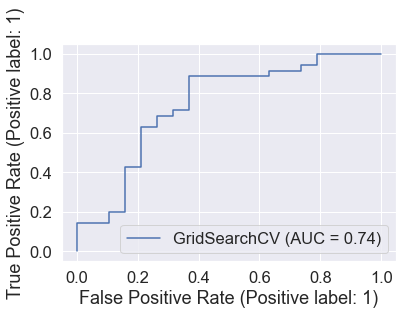

In [ ]:
# visualização do ROC Curve
plot_roc_curve(gs_knn, X_test, y_test);

Com um AUC de 0,74 posso concluir o KNN tem 74% chances de fazer previsões corretas.

A matriz de confusão é uma tabela que mostra as frequências de classificação para cada do modelo. Essa tabela mostra do:
* Verdadeiro Positivo(TP) - ocorre quando a classe que estamos buscando (1) foi prevista corretamente.
* Falso Positivo (FP) - ocorre quando a classe que estamos buscando foi prevista incorretamente.
* Verdadeiro Negativo (TN) - ocorre quando a classe que não estamos buscando (0 - Sem doença cardíaca) foi prevista corretamente.
* Falso Negativo (FN) - corre quando a classe que não estamos buscando (0 - Sem doença cardíaca) prever foi prevista incorretamente.

Com uma accuracy de 76%, o modelo de KNN melhorado com GridSearchCV permite afirmar que o nosso modelo acerta 7 de 10 previsões.

A `accuracy` diz quanto o modelo acertou das previsões possíveis A fórmula de accuracy pode ser vista na imagem seguinte:

![](https://miro.medium.com/max/736/1*tNTpugu1beoC3f6ivswnsA.png)


In [ ]:
# matriz de confusão
print(confusion_matrix(y_test, y_preds_knn))

[[12  7]
 [ 6 29]]


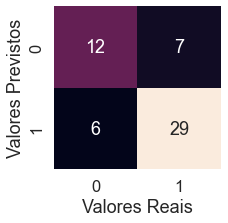

In [ ]:
sns.set(font_scale = 1.5)
def plot_conf_matrix(y_test, y_preds_knn):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds_knn),
                    annot = True,
                    cbar = False)
    plt.xlabel('Valores Reais');
    plt.ylabel('Valores Previstos')
    
plot_conf_matrix(y_test, y_preds_knn)

* 12 casos em que os pacientes não têm doença cardíaca foram previstas corretamente. (Verdadeiro Negativo)
* 29 casos em os pacientes foram diagnosticados com doença cardíaca foram previstas corretamnte.(Verdadeiro Positivo)
* Temos 7 casos de falso positivos, isto é, a classe 1 (têm doença cardíaca) foi prevista como sendo falso mas na realidade é verdadeiro.
* Temos 6 casos de falss negativos, isto é, a classe 0 (não têm doença cardíaca) foi prevista como verdadeiro mas na realidade é falso.

`Precision`

Segundo o curso do [Google Developers](https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall), eles definem a precision como a resposta para a seguinte pergunta: Qual a proporção de identificações positivas foi realmente correta? Em outras palavras, o qual bem meu modelo trabalhou.

![](https://miro.medium.com/max/298/1*pJrHo_sp-pnLFl6Ww3imUw.png)

`Recall`

Recall pretender responder a seguinte pergunta: qual proporção de positivos foi identificados corretamente? Em outras palavras, quão bom meu modelo é para prever positivos, sendo positivo entendido como a classe que se quer prever, no nosso contexto, se um paciente tem doença cardíaca.

![](https://miro.medium.com/max/248/1*zgmkLfNNRtFwCHp8m46AKA.png)

`F1-Score`

Já o f1-score nos mostra o balanço entre a precisão e o recall de nosso modelo. Sua fórmula é:

![](https://miro.medium.com/max/325/1*sBVtY3BJoJbOs47ZZx46tA.png)

In [ ]:
# Classification Report

print(classification_report(y_test, y_preds_knn))

              precision    recall  f1-score   support

           0       0.67      0.63      0.65        19
           1       0.81      0.83      0.82        35

    accuracy                           0.76        54
   macro avg       0.74      0.73      0.73        54
weighted avg       0.76      0.76      0.76        54



Houve melhoria após aplicar o GridSearch mas mesmo assim ficou abaixo da baseline da Random Forest, então vou descartar o KNN e seguir para o tuning do SVM e Random Forest.

#### Hyperparameter tuning

##### GridSearchCV - Support Vector Machine

O SVM é um algoritmo que construi um hiperplano para separar duas classes. Esse hiperplano é feito de forma iterativa de forma aa minimizar o erro. O objetivo central do SVM é encontrar hiperplano marginal máximo que divide as duas classes.

Alguns problemas não podem ser resolvidos recorrendo ao hiperplano linear, como é este caso. A partir da visualização `pairplot`, os dados não são linearmente distribuídas. Por isso na definição dos parâmetros do SVM, o kernel `linear`não pode ser usado. vou usar o `RBF` considerando o hiperplano não linear.

[](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1526288453/index_bnr4rx.png)

In [ ]:
# definir o random seed
np.random.seed(42)

# definir os parâmetros do SVM
svm_param_grid = {'C': [0.1, 1, 10, 100, 1000], # valores aleatórios
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid_search_svm = GridSearchCV(SVC(), svm_param_grid, cv = 5, verbose = True, n_jobs = -1)
                                  
grid_search_svm.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=True)

In [ ]:
grid_search_svm.best_params_

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}

In [ ]:
grid_search_svm.score(X_test, y_test)

0.8333333333333334

Houve um aumento muito bom, atingindo 83% que é o mesmo do Random Forest tanto na versão baseline e na versão com RandomizedGridSearchCV.

Testarei o Random Forest com GridSerachCV abaixo para ver se há melhorias.

### 5.2 Evaluation SVM

In [ ]:
# predição no modelo melhorado com Grid SearchCV
y_preds_svm = grid_search_svm.predict(X_test)

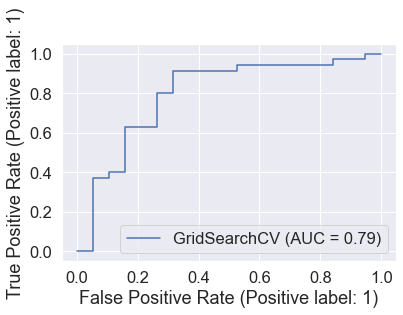

In [ ]:
plot_roc_curve(grid_search_svm, X_test, y_test);b

Com um AUC de 0,79 posso concluir o SVM tem 79% chances de fazer previsões corretas.

In [ ]:
print(confusion_matrix(y_test, y_preds_svm))

[[13  6]
 [ 3 32]]


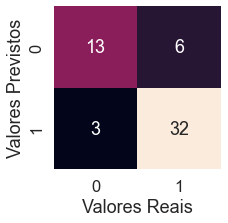

In [ ]:
# matriz de confusão visualmente
sns.set(font_scale = 1.5)
def plot_conf_matrix(y_test, y_preds_svm):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds_svm),
                    annot = True,
                    cbar = False)
    plt.xlabel('Valores Reais');
    plt.ylabel('Valores Previstos')
    
plot_conf_matrix(y_test, y_preds_svm)

* 13 casos em que os pacientes não têm doença cardíaca foram previstas corretamente. (Verdadeiro Negativo)
* 32 casos em os pacientes foram diagnosticados com doença cardíaca foram previstas corretamnte.(Verdadeiro Positivo)
* Temos 6 casos de falso positivos, isto é, a classe 1 (têm doença cardíaca) foi prevista como sendo falso mas na realidade é verdadeiro.
* Temos 3 casos de falss negativos, isto é, a classe 0(não têm doença cardíaca) foi prevista como verdadeiro mas na realidade é falso.

In [ ]:
# Classification Report

print(classification_report(y_test, y_preds_svm))

              precision    recall  f1-score   support

           0       0.81      0.68      0.74        19
           1       0.84      0.91      0.88        35

    accuracy                           0.83        54
   macro avg       0.83      0.80      0.81        54
weighted avg       0.83      0.83      0.83        54



In [ ]:
grid_search_svm.best_params_

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}

#### Cálculo das métricas com Cross-validation - SVM

In [ ]:
#criar um novo classificador para o SVM
svm_clf = SVC(C = 100, gamma = 0.0001, kernel = 'rbf')

In [ ]:
# Accuracy com cross-validation
cv_acc_svm = cross_val_score(svm_clf, X, y, cv = 5, scoring = 'accuracy')
cv_acc_svm = np.mean(cv_acc_svm)

In [ ]:
# Média da accuracy na divisão 5-fold cross-validation
print(f'The mean of accuracy across 5-fold cross-validation is {cv_acc_svm}')

The mean of accuracy across 5-fold cross-validation is 0.7750524109014675


In [ ]:
# Precision com cross-validation
cv_prec_svm = cross_val_score(svm_clf, X, y, cv = 5, scoring = 'precision')
cv_prec_svm = np.mean(cv_prec_svm)

In [ ]:
# Média da Precision na divisão 5-fold cross-validation
print(f'The mean of precision across 5-fold cross-validation is {cv_prec_svm}')

The mean of precision across 5-fold cross-validation is 0.7639760042136953


In [ ]:
# Recall com Cross-validation
cv_rec_svm = cross_val_score(svm_clf, X, y, cv = 5, scoring = 'recall')
cv_rec_svm = np.mean(cv_rec_svm)

In [ ]:
# Média do Recall na divisão 5-fold cross-validation
print(f'The mean of recall across 5-fold cross-validation is {cv_rec_svm}')

The mean of recall across 5-fold cross-validation is 0.8903225806451612


In [ ]:
# F1-score com Cross-validation
cv_f1_svm = cross_val_score(svm_clf, X, y, cv = 5, scoring = 'f1')
cv_f1_svm = np.mean(cv_f1_svm)

In [ ]:
# Média do F1-score na divisão 5-fold cross-validation
print(f'The mean of f1-score across 5-fold cross-validation is {cv_f1_svm}')

The mean of f1-score across 5-fold cross-validation is 0.8210154819500385


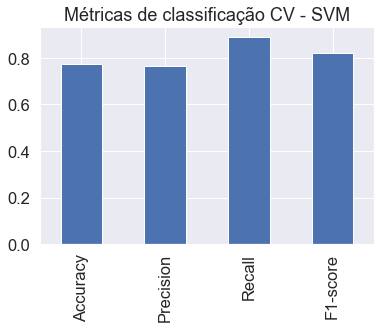

In [ ]:
# visualmente
svm_cv_metrics = pd.DataFrame({"Accuracy": cv_acc_svm,
                         "Precision": cv_prec_svm,
                         "Recall": cv_rec_svm,
                          "F1-score": cv_f1_svm},
                          index = [0])

svm_cv_metrics.T.plot.bar(title = 'Métricas de classificação CV - SVM',
                     legend = False);

#### Hyperparameter tuning

##### GridSearch - Random Forest

O Random Forest é um algoritmo de ensemble que seleciona aleatoriamente um subconjunto de features e monta uma mini arvore de decisão. São criadas várias `árvores de decisão` que ao estarem `juntos`acabam por gerar melhor resultados e controlar o `overfitting`. O tamanho do subconjunto é controlado por `max-samples`. Caso não for estabelecido um valor para este hiperparâmetro, o dataset inteiro vai ser usado para cosntruir cada árvore de decisão.

In [ ]:
# hyperparameter grid for Random Forest
rand_forest_grid = {'n_estimators': np.arange(10, 210, 10), 
                   "max_depth": [10, 110, 5],
                   "min_samples_split": np.arange(2, 10, 2),
                   "min_samples_leaf": np.arange(1, 10, 2)}


# Grid Search Random Forest
gs_rand_forest = GridSearchCV(RandomForestClassifier(),
                             param_grid = rand_forest_grid,
                             cv = 5,
                             verbose = True,
                             n_jobs = -1)

gs_rand_forest.fit(X_train, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 110, 5],
                         'min_samples_leaf': array([1, 3, 5, 7, 9]),
                         'min_samples_split': array([2, 4, 6, 8]),
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])},
             verbose=True)

In [ ]:
gs_rand_forest.best_params_

{'max_depth': 110,
 'min_samples_leaf': 5,
 'min_samples_split': 4,
 'n_estimators': 50}

In [ ]:
gs_rand_forest.score(X_test, y_test)

0.8518518518518519

Houve uma melhoria de mais ou menos 2% em relação ao baseline. Abaixo vou calcular as métricas com o cross-validation. 

### 5.3 Evaluation Random Forest

In [ ]:
# predição no modelo melhorado com Grid SearchCV
y_preds_rf = gs_rand_forest.predict(X_test)

##### ROC Curve

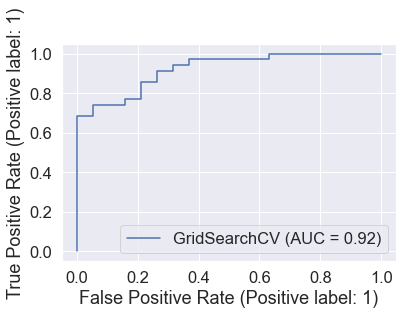

In [ ]:
plot_roc_curve(gs_rand_forest, X_test, y_test);

Com um AUC de 0,92 posso concluir o Random Forest tem 92% chances de fazer previsões corretas.

##### Matriz de Confusão

In [ ]:
print(confusion_matrix(y_test, y_preds_rf))

[[13  6]
 [ 2 33]]


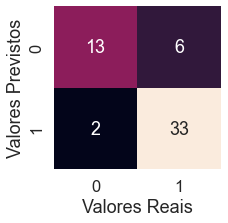

In [ ]:
# matriz de confusão visualmente
sns.set(font_scale = 1.5)
def plot_conf_matrix(y_test, y_preds_rf):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds_rf),
                    annot = True,
                    cbar = False)
    plt.xlabel('Valores Reais');
    plt.ylabel('Valores Previstos')
    
plot_conf_matrix(y_test, y_preds_rf)

In [ ]:
# Classification Report

print(classification_report(y_test, y_preds_rf))

              precision    recall  f1-score   support

           0       0.87      0.68      0.76        19
           1       0.85      0.94      0.89        35

    accuracy                           0.85        54
   macro avg       0.86      0.81      0.83        54
weighted avg       0.85      0.85      0.85        54



##### Cálculo das métricas com Cross-validation - Random Forest

In [ ]:
# verificar os melhores parametros
gs_rand_forest.best_params_

{'max_depth': 110,
 'min_samples_leaf': 5,
 'min_samples_split': 4,
 'n_estimators': 50}

In [ ]:
# criar um novo classificador
rf_clf = RandomForestClassifier(max_depth = 110, min_samples_leaf = 5, min_samples_split = 4, n_estimators = 50)

In [ ]:
# Accuracy com cross-validation
cv_acc = cross_val_score(rf_clf, X, y, cv = 5, scoring = 'accuracy')
cv_acc = np.mean(cv_acc)

In [ ]:
# Média da accuracy na divisão 5-fold cross-validation
print(f'The mean of accuracy across 5-fold cross-validation is {cv_acc}')

The mean of accuracy across 5-fold cross-validation is 0.8389238294898671


In [ ]:
# Precision com cross-validation
cv_prec = cross_val_score(rf_clf, X, y, cv = 5, scoring = 'precision')
cv_prec = np.mean(cv_prec)

In [ ]:
# Média da Precision na divisão 5-fold cross-validation
print(f'The mean of precision across 5-fold cross-validation is {cv_prec}')

The mean of precision across 5-fold cross-validation is 0.8416795051353875


In [ ]:
# Recall com Cross-validation
cv_rec = cross_val_score(rf_clf, X, y, cv = 5, scoring = 'recall')
cv_rec = np.mean(cv_rec)

In [ ]:
# Média do Recall na divisão 5-fold cross-validation
print(f'The mean of recall across 5-fold cross-validation is {cv_rec}')

The mean of recall across 5-fold cross-validation is 0.8903225806451612


In [ ]:
# F1-score com Cross-validation
cv_f1 = cross_val_score(rf_clf, X, y, cv = 5, scoring = 'f1')
cv_f1 = np.mean(cv_f1)

In [ ]:
# Média do F1-score na divisão 5-fold cross-validation
print(f'The mean of f1-score across 5-fold cross-validation is {cv_f1}')

The mean of f1-score across 5-fold cross-validation is 0.8719374517581067


##### Visualization of cross-validation metrics

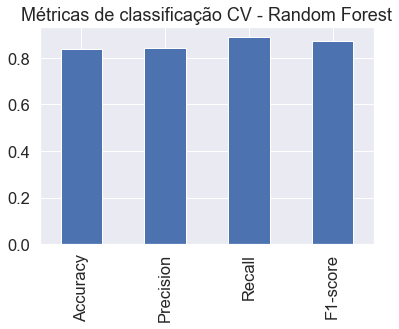

In [ ]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                         "Precision": cv_prec,
                         "Recall": cv_rec,
                          "F1-score": cv_f1},
                          index = [0])

cv_metrics.T.plot.bar(title = 'Métricas de classificação CV - Random Forest',
                     legend = False);

### 6 - Conclusões e Trabalhos Futuros

Após executar os modelos e fazer o tuning com o GridSearch, podemos constatar que todos os modelos conseguiram melhorias de performance, sendo o Random Forest o modelo com melhores performances. O sucesso do Random Forest pode ser explicado pela maneira de como este estimador funciona, criando subconjuntos de features e criação de árvores de decisão até chegar a um valor ótimo e estável.

Para trabalhos futuros, recomendo o uso de outros algoritmos tais como:
* Regressão Logística (que apesar do nome regresão, é usada nos problemas de classificação)
* [XGBoost](https://xgboost.readthedocs.io/en/stable/)